In [2]:
os.chdir("projects_on_GitHub/POC/python_probability_practices")

## Hypothesis Testing

In hypothesis testing, we could simulate a sampling distribution from the null hypothesis using characteristics that would be true if our data came from the null.

### Example: Average height of all individuals are higher than 70 or not?
Whether the average height of coffee drinkers (including both coffee drinkers and non-coffee drinkers) is higher than 70 or not?

$$H_0: \mu_0 \leq 70$$

$$H_1: \mu_0 \gt 70$$

#### Original Method

In [5]:
df = pd.read_csv('coffee_dataset.csv')
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [8]:
np.random.seed(42)
sample150 = df.sample(150)
sample150.shape

(150, 4)

In [9]:
mns = []
for _ in range(10000):
    bootstrap = sample150.sample(150, replace=True)
    mns.append(bootstrap.height.mean())

In [12]:
lower_bound, upper_bound = np.percentile(mns, [2.5, 97.5])
lower_bound, upper_bound

(67.10258508046547, 68.15617490636113)

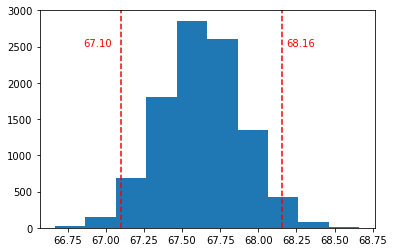

In [25]:
plt.hist(mns)

plt.axvline(lower_bound, color='red', linestyle='--')
plt.axvline(upper_bound, color='red', linestyle='--')

plt.text(lower_bound-.25, 2500, s="{:.2f}".format(lower_bound), color='red')
plt.text(upper_bound+.03, 2500, s="{:.2f}".format(upper_bound), color='red');

**Conclusion:** we believe the average height of the individuals in the dataset is less than 70.

#### A professional way ...

___Step 1:___ we simulate from the closest value to the alternative that is still in the null space.

___Step 2:___ we simulate the distribution under the assumption that the null hypothesis is true. (According to the central limit theorem, the mean of sampling distribution would be normal distribution.)

In [28]:
mns_std = np.std(mns)
mns_std

0.2658039514418038

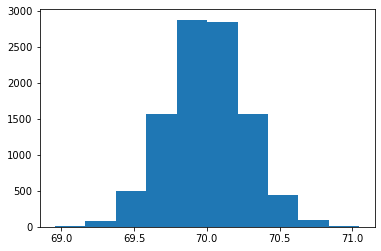

In [30]:
plt.hist(np.random.normal(loc=70, scale=mns_std, size=10000));

In [31]:
mean_sample150 = sample150.height.mean()
mean_sample150

67.63297688228066

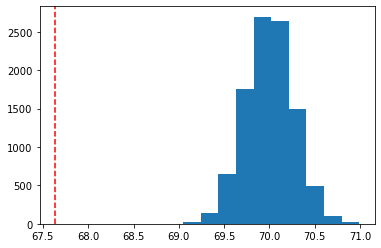

In [32]:
plt.hist(np.random.normal(loc=70, scale=mns_std, size=10000))
plt.axvline(mean_sample150, color='red', linestyle='--');

__Conclusion:__ It seems unlikely that the sample we have is from the our hypothesis distribution (centering 70 with std 0.266). So we can reject our hypothesis, and in this case we can say we have evidence that the average height is less than 70.

### Example: Comparing average height of coffee drinkers and non-coffee drinkers

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?

$$H_0: \mu_{drinkers} - \mu_{non-drinkers} =0$$

$$H_0: \mu_{drinkers} - \mu_{non-drinkers} \neq0$$

In words,<br>

**Null hypothesis:** The average height for all coffee drinkers is the same as rhe average height for all non-coffee drinkers.

**Alternative hypothesis:** The average height for all coffee drinkers is not the same as the average height for all non-coffee drinkers.

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be? 

$$H_0: \mu_{drinkers} - \mu_{non-drinkers} \geq0$$

$$H_0: \mu_{drinkers} - \mu_{non-drinkers} \lt0$$

In words,<br>

**Null hypothesis:** The average height for all coffee drinkers is the same or greater than the average height for all non-coffee drinkers.

**Alternative hypothesis:** The average height for all coffee drinkers is less than the average height for all non-coffee drinkers.

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.

In [34]:
np.random.seed(42)
sample200 = df.sample(200)
sample200.shape

(200, 4)

In [37]:
mns_Drinkers = []
mns_NonDrinkers = []
diffs = []

for _ in range(10000):
    bs_sample = sample200.sample(200, replace=True)
    mn_Drinkers = bs_sample.query('drinks_coffee==True').height.mean()
    mn_NonDrinkers = bs_sample.query('drinks_coffee==False').height.mean()
    diff = mn_Drinkers - mn_NonDrinkers
    
    mns_Drinkers.append(mn_Drinkers)
    mns_NonDrinkers.append(mn_NonDrinkers)
    diffs.append(diff)

In [48]:
std_drinkers = np.std(mns_NonDrinkers)
std_NonDrinkers = np.std(mns_Drinkers)
std_diffs = np.std(diffs)
output_str = ("The standard deviation of the sampling distribution for the "
              "mean of those that do not drink coffee is {:.2f}.\n"
              "The standard deviation of the sampling distribution for the "
              "mean of those that drink coffee is {:.2f}.\n"
              "The standard deviation of the sampling distribution for the "
              "difference in means of those that drink coffee and those that do not is {:.2f}.")

print(output_str.format(std_drinkers, std_NonDrinkers, std_diffs))

The standard deviation of the sampling distribution for the mean of those that do not drink coffee is 0.41.
The standard deviation of the sampling distribution for the mean of those that drink coffee is 0.24.
The standard deviation of the sampling distribution for the difference in means of those that drink coffee and those that do not is 0.47.


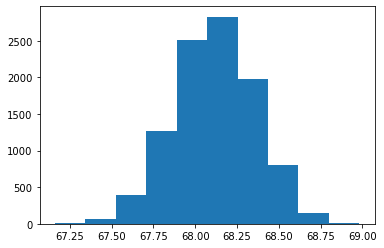

In [41]:
# Average Height Distribution for the coffee drinkers
plt.hist(mns_Drinkers);

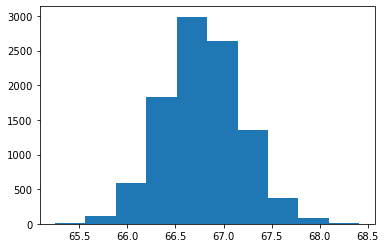

In [43]:
# Average Height Distribution for the non-coffee drinkers
plt.hist(mns_NonDrinkers);

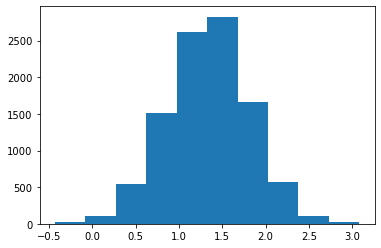

In [44]:
# Differences in Avgerage Height Distribution between coffee drinkers and non-coffee drinkers
plt.hist(diffs);

**According to the central limit theorem, we can see all the distributions above are normal distribution.**

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. 

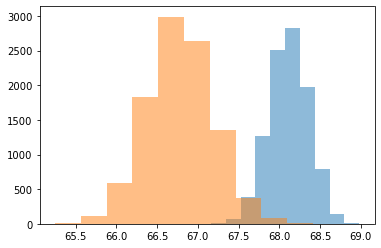

In [50]:
plt.hist(mns_Drinkers, alpha=.5)
plt.hist(mns_NonDrinkers, alpha=.5);

In [51]:
np.std(diffs)

0.4697817405631586

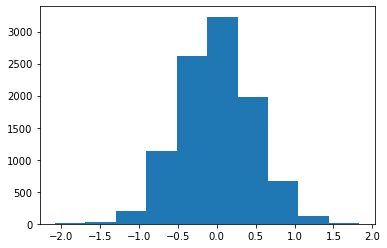

In [54]:
plt.hist(np.random.normal(0, np.std(diffs), 10000));

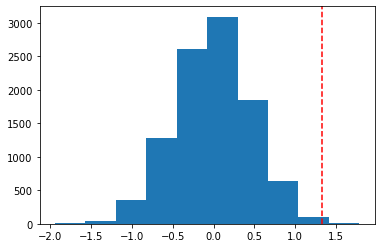

In [59]:
obs_Drinkers = sample200.query('drinks_coffee==True').height.mean()
obs_NonDrinkers = sample200.query('drinks_coffee==False').height.mean()
obs_diff = obs_Drinkers - obs_NonDrinkers
plt.hist(np.random.normal(0, np.std(diffs), 10000))
plt.axvline(obs_diff, color='r', linestyle='--');

**Conclusion:** 
1. We can expect the standard deviation of the sampling distribution for differences from the null to be essentially the same as what we observed from the data.
2. If the null hypothesis is true, we would expect the difference in means of coffee drinkers and non-drinkers to be zero.

## Calculating P-Value

**Step 1:** Simulate the values of your statistic that are possible from the null.<br>
**Step 2:** Calculate the value of the statistic you actually obtained in your data.<br>
**Step 3:** Compare your statistic to the values from the null.<br>
**Step 4:** Calculate the proportion of null values that are considered extreme based on your alternative.

### Example

In [83]:
np.random.seed(42)
df = pd.read_csv('coffee_dataset.csv')
sample_df = df.sample(150)

In [84]:
means = []

for _ in range(10000):
    # Create bootstrap sample
    bs_sample = sample_df.sample(150, replace=True)
    
    # Store mean height from each bootstrap sample in list of `means`
    means.append(bs_sample.height.mean())

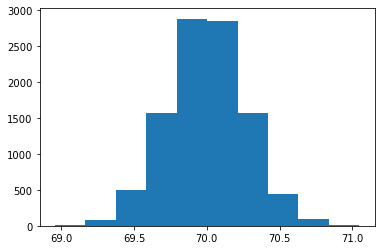

In [85]:
# Use the std of the means above to simulate distribution from null hypothesis
null_values = np.random.normal(70, np.std(means), 10000)

plt.hist(null_values);

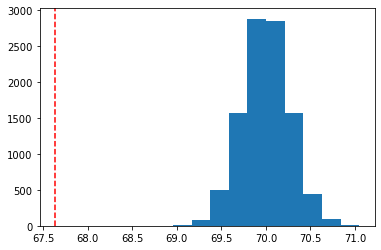

In [86]:
# Plot the mean height of the observed data in the histogram
sample_mean = sample_df.height.mean()
plt.hist(null_values)
plt.axvline(sample_mean, color='red', linestyle='--');

___Scenario 1:___

$H_0: \mu \leq 70$

$H_1: \mu > 70$

In [87]:
# Calculate the P-value
(null_values > sample_mean).mean()

1.0

**So we do not have sufficient evidence to reject the null hypothesis. In other words, we fail to reject the null. Namely the average height is no greater than 70.**

___Scenario 2:___

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [88]:
(null_values < sample_mean).mean()

0.0

**We have evidence to reject the null and choose the alternative, namely the average height is less than 70.**

___Scenario 3:___

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [89]:
null_mean = 70
(null_values < sample_mean).mean() + (null_values > (null_mean + (null_mean - sample_mean))).mean()

0.0

**We have evidence to reject the null and choose its alternative hypothesis, namely the average height is not equal to 70.**

### Example: Calculating Type I and Type II Errors

Two datasets will be bused for this examples.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets is based on real people.


In [95]:
jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')


In [96]:
jud_data.head()

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


In [97]:
par_data.head()

,parachute_id,actual,predicted
0,3956,opens,opens
1,2147,opens,opens
2,2024,opens,opens
3,8325,opens,opens
4,6598,opens,opens


In [110]:
par_data.actual.unique()

array(['opens', 'fails'], dtype=object)

`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.

___Null Hypothesis:___ **`innocent`**<br>
___Alternative Hypothesis:___ **`guilty`**

The following questions have been explored:
- Total error percentage?
- Type I error percentage?
- Type II error percentage?
- If all are predicted as `guilty`, the type I error percentage would be commited?
- If all are predicted as `guilty`, the type II error percentage would be commited?
- If all are predicted as `innocent`, the type I error percentage would be commited?
- If all are predicted as `innocent`, the type II error percentage would be commited?

In [109]:
# Total records
num_records = jud_data.shape[0]

# Total percentage of errors
num_errors = (jud_data.actual != jud_data.predicted).sum()

# Total error percentage
errors_pct = num_errors/num_records
print("Total error percentage is: {:.2%}".format(errors_pct))

#*****Type I Error****
# Calculate number of Type I Error
num_typeI = ((jud_data.actual=='innocent') & (jud_data.predicted=='guilty')).sum()

# Calculate percentage of Type I Error
pct_typeI = num_typeI/num_records
print("Type I error percentage is: {:.2%}".format(pct_typeI))


#*****Type II Error****
# Calculate number of Type II Error
num_typeII = ((jud_data.actual=='guilty') & (jud_data.predicted=='innocent')).sum()

# Calculate percentage of Type II Error
pct_typeII = num_typeII/num_records
print("Type II error percentage is: {:.2%}".format(pct_typeII))

#
# If everyone was predicted to be `guilty`, 
# the percentage of Type I Errors made.
inno_pct = (jud_data.actual=='innocent').sum()/num_records
print("Type I error percentage committed given all are predicted as guilty: {:.2%}".format(inno_pct))

# If everyone was predicted to be `guilty`, 
# the proportion of Type II Errors made will be 0.
print("Type II error percentage committed given all are predicted as guilty: {}".format(0))

# If everyone was predicted to be `innocent`, 
# the proportion of Type I Errors made will be 0.
print("Type I error percentage committed given all are predicted as innocent: {}".format(0))

# If everyone was predicted to be `innocent`, 
# the percentage of Type I Errors made.
guilty_pct = (jud_data.actual=='guilty').sum()/num_records
print("Type II error percentage committed given all are predicted as innocent: {:.2%}".format(guilty_pct))


Total error percentage is: 4.22%
Type I error percentage is: 0.15%
Type II error percentage is: 4.06%
Type I error percentage committed given all are predicted as guilty: 45.16%
Type II error percentage committed given all are predicted as guilty: 0
Type I error percentage committed given all are predicted as innocent: 0
Type II error percentage committed given all are predicted as innocent: 54.84%


`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.

___Null Hypothesis:___ **`fails`**<br>
___Alternative Hypothesis:___ **`opens`**

The following questions have been explored:
- Total error percentage?
- Type I error percentage?
- Type II error percentage?
- If all are predicted as `fails`, the type I error percentage would be commited?
- If all are predicted as `fails`, the type II error percentage would be commited?
- If all are predicted as `opens`, the type I error percentage would be commited?
- If all are predicted as `opens`, the type II error percentage would be commited?

In [118]:
# Total records
num_records = par_data.shape[0]

# Total percentage of errors
num_errors = (par_data.actual != par_data.predicted).sum()

# Total error percentage
errors_pct = num_errors/num_records
print("Total error percentage is: {}".format(errors_pct))

#*****Type I Error****
# Calculate number of Type I Error
num_typeI = ((par_data.actual=='fails') & (par_data.predicted=='opens')).sum()

# Calculate percentage of Type I Error
pct_typeI = num_typeI/num_records
print("Type I error percentage is: {}".format(pct_typeI))


#*****Type II Error****
# Calculate number of Type II Error
num_typeII = ((par_data.actual=='opens') & (par_data.predicted=='fails')).sum()

# Calculate percentage of Type II Error
pct_typeII = num_typeII/num_records
print("Type II error percentage is: {}\n".format(pct_typeII))

#
# If everyone was predicted to be `opens`, 
# the percentage of Type I Errors made.
typeI_pct = (par_data.actual=='fails').sum()/num_records
print("Type I error percentage committed given all are predicted as opens: {}".format(typeI_pct))

# If everyone was predicted to be `opens`, 
# the proportion of Type II Errors made will be 0.
print("Type II error percentage committed given all are predicted as opens: {}\n".format(0))

# If everyone was predicted to be `fails`, 
# the proportion of Type I Errors made will be 0.
print("Type I error percentage committed given all are predicted as fails: {}".format(0))

# If everyone was predicted to be `fails`, 
# the percentage of Type I Errors made.
typeII_pct = (par_data.actual=='opens').sum()/num_records
print("Type II error percentage committed given all are predicted as fails: {}".format(typeII_pct))


Total error percentage is: 0.039972551037913875
Type I error percentage is: 0.00017155601303825698
Type II error percentage is: 0.03980099502487562

Type I error percentage committed given all are predicted as opens: 0.008234688625836336
Type II error percentage committed given all are predicted as opens: 0

Type I error percentage committed given all are predicted as fails: 0
Type II error percentage committed given all are predicted as fails: 0.9917653113741637
